<a href="https://colab.research.google.com/github/maurab12/mauranicolefinalproject/blob/main/BurtonDiezFinalProjectOffical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City of Chicago Current Employee Names, Salaries, and Position Titles

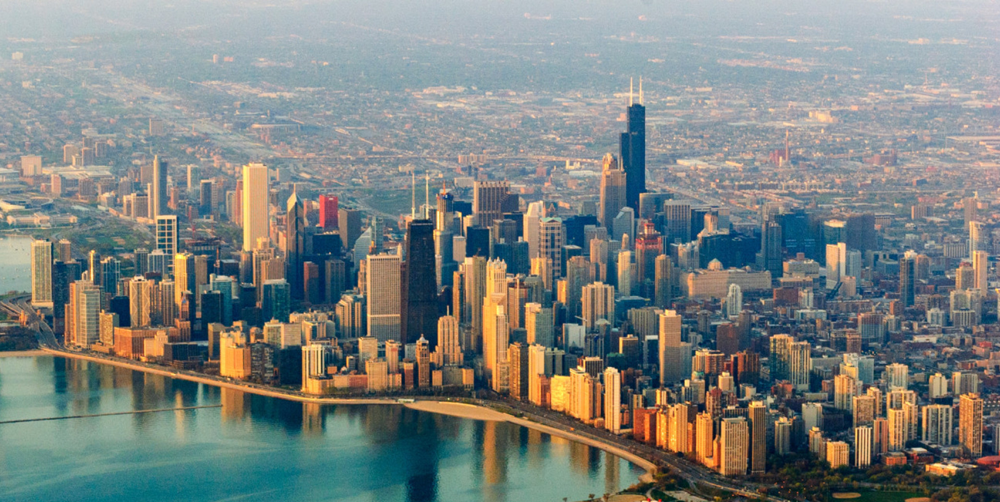

# Why did we pick the dataset?
---
- We are from the Northern suburbs of Chicago
- We both want to live and work in Chicago after graduation
- We find it interesting to learn the positions and salaries that they recieve as we soon be in their shoes

# Questions?
---
- What is the highest paying full-time position?
- What is the lowest paying full-time position?
- What is the distribution of salaries?
- What position has the most employees?
- Whar are the top 10 common department?
- What is the least common job title?


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv("https://github.com/maurab12/mauranicolefinalproject/blob/main/Current_Employee_Names__Salaries__and_Position_Titles%20(1).csv?raw=true")
display(df)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,44.4
...,...,...,...,...,...,...,...,...
31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


In [4]:
df = df.reset_index()

In [5]:
df

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,44.4
...,...,...,...,...,...,...,...,...,...
31853,31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31854,31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31855,31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31856,31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


## The Number of Rows and Columns
---

In [6]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(num_rows)
print(num_cols)

31858
9


##Concise summary of our DataFrame
---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31858 entries, 0 to 31857
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              31858 non-null  int64  
 1   Name               31858 non-null  object 
 2   Job Titles         31858 non-null  object 
 3   Department         31858 non-null  object 
 4   Full or Part-Time  31858 non-null  object 
 5   Salary or Hourly   31858 non-null  object 
 6   Typical Hours      7024 non-null   float64
 7   Annual Salary      24834 non-null  float64
 8   Hourly Rate        7024 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


In [8]:
display(df)

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,44.4
...,...,...,...,...,...,...,...,...,...
31853,31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31854,31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31855,31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31856,31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


##Grouping our Data to Better Answer Some of Our Questions
--- We created a count column so that we were able to have another numerical column.

In [9]:
df_by_job_titles = df.groupby(['Job Titles'], as_index=False).agg({
    'index': 'count',
    'Annual Salary': 'mean',
    'Hourly Rate': 'mean'
}).rename(columns={
    'index': 'Count'
}).sort_values('Count', ascending=False)

df_by_job_titles

,Job Titles,Count,Annual Salary,Hourly Rate
780,POLICE OFFICER,9307,84481.863114,NaN
519,FIREFIGHTER-EMT,1372,102326.790087,NaN
928,SERGEANT,1241,121858.844480,NaN
785,POLICE OFFICER (ASSIGNED AS DETECTIVE),1077,99078.651811,NaN
732,MOTOR TRUCK DRIVER,1002,NaN,38.367076
...,...,...,...,...
405,DIRECTOR OF HUMAN RESOURCES,1,116820.000000,NaN
406,DIRECTOR OF INTERNAL AUDIT,1,110052.000000,NaN
407,DIRECTOR OF LABOR STANDARDS,1,120000.000000,NaN
408,DIRECTOR OF LEGAL SERVICES,1,135624.000000,NaN


## Filtering our DataFrame to only Full-Time Worker
- We want to only look at the data of Full-Time Employees as we are going to be Full-Time workers out of college.
---

In [10]:
df_fulltime = df[(df['Full or Part-Time'] == 'F')]
df_fulltime

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,44.4
...,...,...,...,...,...,...,...,...,...
31853,31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31854,31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31855,31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31856,31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


##Dropping Typical Hours and Hourly Rate Columns & Renaming Columns
- There is no need for "Typical Hours" and "Hourly Rate" as we are only looking at Full-Time workers.
---

In [11]:
df_fulltime = df_fulltime.copy()
df_fulltime.drop(columns=['Typical Hours', 'Hourly Rate'], inplace = True)
df_fulltime.rename(columns={'Full or Part-Time': 'Full-Time'}, inplace = True)
df_fulltime.rename(columns={'Salary or Hourly': 'Salary'}, inplace = True)
df_fulltime

,index,Name,Job Titles,Department,Full-Time,Salary,Annual Salary
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,118998.0
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,97440.0
2,2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,121272.0
3,3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,119712.0
4,4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN
...,...,...,...,...,...,...,...
31853,31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,76266.0
31854,31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,80016.0
31855,31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,90024.0
31856,31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,93354.0


## Organized the DataFrame To Show the Beginning of Our DataFrame
---

In [12]:
df.head()

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,44.4


##Organized the DataFrame To Show the End of our DataFrame
---

In [13]:
df.tail()

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
31853,31853,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
31854,31854,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31855,31855,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31856,31856,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
31857,31857,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DAIS,F,Salary,NaN,135336.0,NaN


##A Sample of 8 People from our DataFrame
---

In [14]:
df.sample(8)

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
680,680,"AMBROSE, KEVIN J",FIREFIGHTER-EMT,FIRE,F,Salary,NaN,101874.0,NaN
12673,12673,"HUERTA, JIM",OPERATING ENGINEER-GROUP A,WATER MGMNT,F,Hourly,40.0,NaN,52.45
8954,8954,"FRANKLIN, ALBERTA M",POLICE COMMUNICATIONS OPERATOR I,OEMC,F,Salary,NaN,80484.0,NaN
1916,1916,"BELLUOMINI, MICHAEL P",POLICE OFFICER (ASGND AS MARINE OFFICER),POLICE,F,Salary,NaN,100980.0,NaN
15979,15979,"LIBERTO, NICHOLAS C",PARAMEDIC I/C,FIRE,F,Salary,NaN,100560.0,NaN
15098,15098,"KROL, BERNADETA",POOL MOTOR TRUCK DRIVER,AVIATION,F,Hourly,40.0,NaN,38.35
27400,27400,"STEWART, ELAINE M",ADMINISTRATIVE ASST II,FINANCE,F,Salary,NaN,76248.0,NaN
30040,30040,"WARE, RODNEY L",FIREFIGHTER-EMT,FIRE,F,Salary,NaN,105420.0,NaN


##1) What is the Highest Paying Full-Time Job Title?
- Organized our data to show the highest 10 salaries of full-time employees.
---

In [15]:
fig = px.bar(df_by_job_titles.sort_values('Annual Salary', ascending=False).head(10), 
              x='Annual Salary', 
              y='Job Titles', 
              title='Highest Paying Full-time Job Title')
fig.show()

##2) What is the Lowest Paying Full-time Job Title?
- We looked at Full-time Employees that do not recieve a salary and instead are paid hourly and looked at the lowest paid ones.
---



In [16]:
fig = px.bar(df_by_job_titles.sort_values('Annual Salary', ascending=False).tail(10), 
              x='Hourly Rate', 
              y='Job Titles', 
              title='Lowest Paying Full-time Job Title')
fig.show()

##3) What is the Distribution of Salaries?
- We examined the Annual Salary of all full time employees and exmained how the city of Chicago employees are compensated.
---

In [17]:
fig = px.box(df_fulltime[df_fulltime['Annual Salary'] < 140000],
             x='Annual Salary',
             orientation='h',
             title='Distribution of Annual Salaries')
fig.show()

##4) What is the Number of Employees within each Salary Distribution?
- We wanted to know the number of employees within the distrubution of salaries. 
---

In [18]:
fig_hist = px.histogram(df_fulltime, 
                       x='Annual Salary', 
                       title='Position With Most Employees', 
                       nbins=36)
fig_hist.show()

##5) What are the Top 10 Common Job Titles?
- We wanted to know what is the most popular job position in Chicago.
---

In [19]:
top10_job_titles = df_fulltime['Job Titles'].value_counts().iloc[:10].index.to_list()

df_top10_jt = df_fulltime[df_fulltime['Job Titles'].isin(top10_job_titles)]

In [20]:
fig = px.pie(
    df_top10_jt,
    names='Job Titles',
    title='Job Titles breakdown',
    width=1000,
    height=1000
)

fig.show()

##6) What is the Least Common Job Title?
- We wanted to know what the least popular job position is in Chicago.
---

In [21]:
fig = px.bar(
    df_by_job_titles.tail(10),
    x='Job Titles',
    y= 'Count',
    title='Least Common Job Title'
)
fig.show()

#Summary of Our Findings
---
As we worked with our DataFrame, we were able to discover many findings by using Colab. Some things that we were able to find are:

--The most popular job position in Chicago are police officers, taking up 56.4% of all the positions. 

--The distribution of salaries across Chicago has a median of $90,024.

--The highest paid employee is Commisioner of Aviation, making $275,000 per year. 

--The three least common job positions are Director of Labor Standards, Director of Legal Services, and 1st Deputy Inspector General, all with one employee in each position.  

--The lowest hourly rate is a Crimes Surveillance Specialist making $19.88 per 
hour. 

--There are about 6,159 people who receive the average salary of $90,024. 

Overall, we really enjoyed the findings from this project and we were very happy with how it all turned out! 


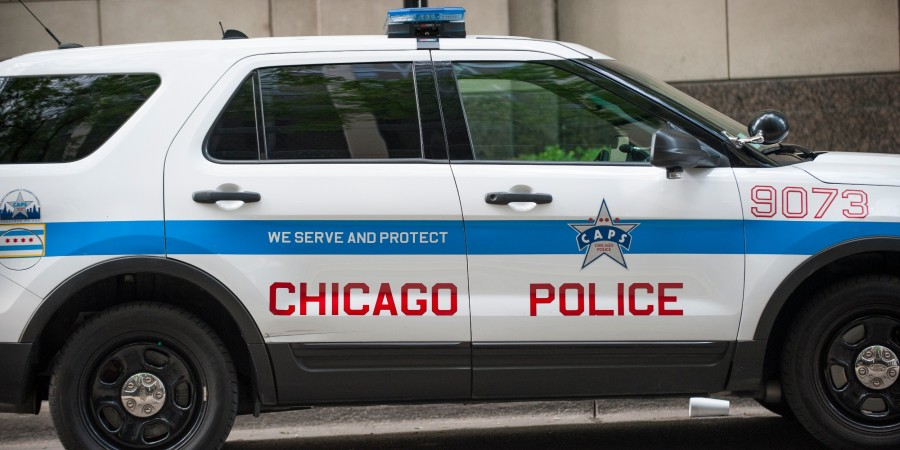